# Lib

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os

# Masking one image

## KMeans sorted labels by lightness

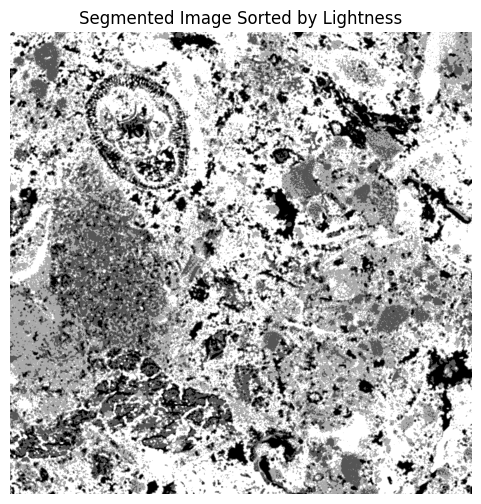

In [2]:
# Read image
image = cv2.imread('Data_enhancement/CLAHE_dlm0000.bmp')
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Flatten RGB image into a 2D array
image_2d = img_rgb.reshape((-1, 3))

# Apply K-means clustering
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(image_2d)
labels = kmeans.predict(image_2d)

# Convert RGB image to HLS (Hue, Lightness, Saturation)
img_hls = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HLS)

# Extract the lightness channel
lightness = img_hls[:, :, 1]

# Calculate the average lightness for each segment
average_lightness = []
labels_2d = labels.reshape((1000, 1000))  # Convert labels to 2D

for label in range(k):
    mask_2d = (labels_2d == label)  # Mask in 2D
    avg_l = np.mean(lightness[mask_2d]) if np.any(mask_2d) else 0
    average_lightness.append((label, avg_l))

# Sort the segments by average lightness
average_lightness.sort(key=lambda x: x[1])

# Create a mapping from old labels to new labels based on lightness
sorted_labels = {old_label: new_label for new_label, (old_label, _) in enumerate(average_lightness)}

# Apply the new sorted labels to the segmented image
sorted_segmented_img = np.copy(labels_2d)
for old_label, new_label in sorted_labels.items():
    sorted_segmented_img[labels_2d == old_label] = new_label

# Display the segmented image sorted by lightness
plt.figure(figsize=(6,6))
plt.imshow(sorted_segmented_img, cmap='gray')
plt.title("Segmented Image Sorted by Lightness")
plt.axis('off')
plt.show()

## Select Porosity Labels as A Masking Image

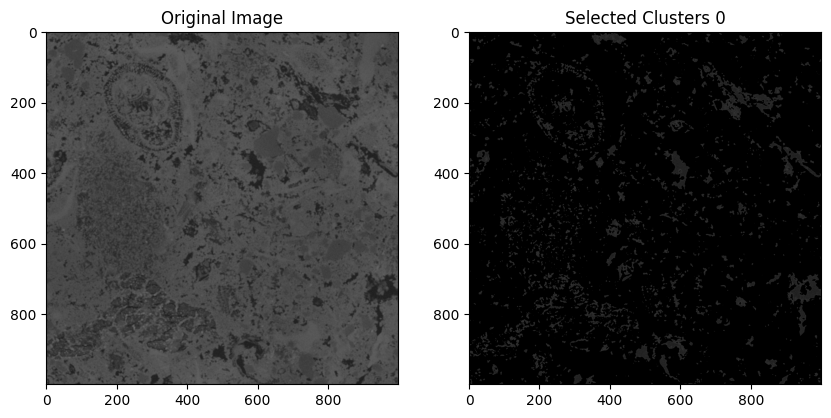

In [3]:
# Menampilkan hasil: hanya cluster 1 dan 2
selected_clusters = [0]  # Pilih cluster yang diinginkan, misalnya cluster 1 dan 2

# Membuat mask untuk cluster yang dipilih
selected_cluster_mask = np.isin(sorted_segmented_img, selected_clusters)

# Merubah mask menjadi bentuk gambar asli
selected_cluster_mask_reshaped = selected_cluster_mask.reshape(img_rgb.shape[:2])

# Mengaplikasikan mask ke gambar untuk mendapatkan area dari cluster yang dipilih
selected_cluster_image = np.copy(img_rgb)
selected_cluster_image[~selected_cluster_mask_reshaped] = 0  # Set pixel non-selected cluster menjadi hitam

# Menampilkan hasil
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(selected_cluster_image)
plt.title('Selected Clusters 0')

plt.show()

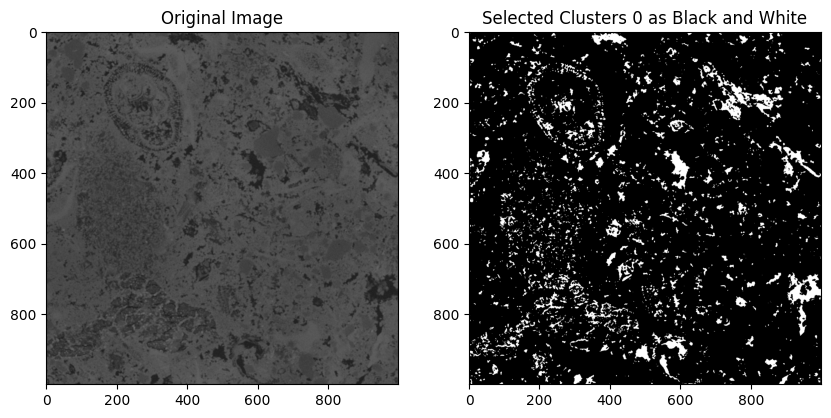

In [4]:
# Menampilkan hasil: hanya cluster 1 dan 2
selected_clusters = [0]  # Pilih cluster yang diinginkan, misalnya cluster 1 dan 2

# Membuat mask untuk cluster yang dipilih
selected_cluster_mask = np.isin(sorted_segmented_img, selected_clusters)

# Merubah mask menjadi bentuk gambar asli
selected_cluster_mask_reshaped = selected_cluster_mask.reshape(img_rgb.shape[:2])

# Membuat gambar hitam-putih berdasarkan mask
segmented_image = np.zeros_like(img_rgb)  # Gambar hitam
segmented_image[selected_cluster_mask_reshaped] = [255, 255, 255]  # Memberikan warna putih untuk cluster yang dipilih

# Menampilkan hasil
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Selected Clusters 0 as Black and White')
plt.show()

# Masking All of The Images

In [5]:
source_folder = "Data_enhancement"
dest_folder = "Data_mask"

if not os.path.exists(dest_folder):
    os.makedirs(dest_folder)


# Ambil semua file dalam folder
image_files = [f for f in os.listdir(source_folder) if f.endswith('.bmp')]

# Loop melalui semua gambar dalam folder
for image_file in image_files:
    image_path = os.path.join(source_folder, image_file)
    
    # Baca gambar
    image = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Flatten RGB image menjadi array 2D
    image_2d = img_rgb.reshape((-1, 3))
    
    # Terapkan K-means clustering
    k = 4
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(image_2d)
    labels = kmeans.predict(image_2d)
    
    # Konversi RGB ke HLS
    img_hls = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HLS)
    lightness = img_hls[:, :, 1]
    
    # Hitung rata-rata lightness per cluster
    average_lightness = []
    labels_2d = labels.reshape((1000, 1000))
    
    for label in range(k):
        mask_2d = (labels_2d == label)
        avg_l = np.mean(lightness[mask_2d]) if np.any(mask_2d) else 0
        average_lightness.append((label, avg_l))
    
    # Urutkan cluster berdasarkan lightness
    average_lightness.sort(key=lambda x: x[1])
    sorted_labels = {old_label: new_label for new_label, (old_label, _) in enumerate(average_lightness)}
    
    # Terapkan urutan baru
    sorted_segmented_img = np.copy(labels_2d)
    for old_label, new_label in sorted_labels.items():
        sorted_segmented_img[labels_2d == old_label] = new_label
    
    # Pilih cluster tertentu (misalnya cluster 0)
    selected_clusters = [0]
    selected_cluster_mask = np.isin(sorted_segmented_img, selected_clusters)
    selected_cluster_mask_reshaped = selected_cluster_mask.reshape(img_rgb.shape[:2])
    
    # Buat gambar hitam-putih berdasarkan mask
    segmented_image = np.zeros_like(img_rgb)
    segmented_image[selected_cluster_mask_reshaped] = [255, 255, 255]
    
    # Simpan hasil
    output_path = os.path.join(dest_folder, f'mask_{image_file}')
    cv2.imwrite(output_path, cv2.cvtColor(segmented_image, cv2.COLOR_RGB2BGR))
